In [26]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker

import mpl_toolkits
from mpl_toolkits import basemap
import matplotlib.cm as cm

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

degree_sign = u'\u00B0'

In [15]:
coastal_latlon_array_indices = numpy.load('../npy_files/coastal_latlon_array_indices_3x.npy')
lat_indices_unique = numpy.unique(coastal_latlon_array_indices[:,0])

In [3]:
working_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/B1850C5CN_CA_REGION/'

In [4]:
file = 'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.04020101-22001231_CA_REGION.nc'

In [5]:
hist_rcp_files = numpy.array(( \
'hist_and_rcp85.001.PRECT.18500101-21001231_CA_REGION.nc', \
'hist_and_rcp85.002.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.003.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.004.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.005.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.006.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.007.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.008.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.009.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.010.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.011.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.012.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.013.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.014.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.015.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.016.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.017.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.018.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.019.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.020.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.021.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.022.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.023.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.024.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.025.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.026.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.027.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.028.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.029.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.030.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.031.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.032.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.033.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.034.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.035.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.101.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.102.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.103.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.104.PRECT.19200101-21001231_CA_REGION.nc', \
'hist_and_rcp85.105.PRECT.19200101-21001231_CA_REGION.nc' ))

In [6]:
d_oct = 31
d_nov = 30
d_dec = 31
d_jan = 31
d_feb = 28
d_mar = 31
days_per_season = d_nov+d_dec+d_jan+d_feb+d_mar

In [50]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

Oroville_dam_lat = 39.5380
Oroville_dam_lon = 121.4831 # deg west
Oroville_dam_lon = 360 - Oroville_dam_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

ncal_lat = 42.
ncal_lon = 236.

scal_lat = LA_lat #33.
scal_lon = LA_lon #244

ccal_lat = SF_lat #37.
ccal_lon = SF_lon #240.

# Open up data

* Open PIC runs
* Calculate gradients, plot
* Open hist/RCP runs for a specific time period of interest
* Calculate gradients, plot
* Plot EOC minus PIC gradients

In [7]:
i = 0

#ncfile = netCDF4.Dataset(working_dir + file_list[i])
ncfile = netCDF4.Dataset(working_dir + file)
PRECT_lat = ncfile.variables['lat'][:]
PRECT_lon = ncfile.variables['lon'][:]
PRECT_time_var = ncfile.variables['time']

#print('done')
PRECT_time_dates = netCDF4.num2date(PRECT_time_var[:], PRECT_time_var.units, PRECT_time_var.calendar)
time_indices_NDJFM = numpy.array([t.month in [11,12,1,2,3] for t in PRECT_time_dates], dtype=bool)
PRECT_time_dates_NDJFM = PRECT_time_dates[time_indices_NDJFM]

#print('done')
PRECT_NDJFM_CA = ncfile.variables['PRECT'][time_indices_NDJFM, :, :]*86400.*1000

done
done


In [8]:
PRECT_NDJFM_CA = PRECT_NDJFM_CA[:,coastal_latlon_array_indices[:,0],coastal_latlon_array_indices[:,1]]

In [11]:
print(PRECT_NDJFM_CA.shape)
PRECT_NDJFM_CA = PRECT_NDJFM_CA.reshape((-1,11,3))

(271648, 33)


In [33]:
mean_pr_pic = numpy.mean(PRECT_NDJFM_CA, axis=0)

In [35]:
mean_pr_pic = numpy.mean(mean_pr_pic, axis=1)

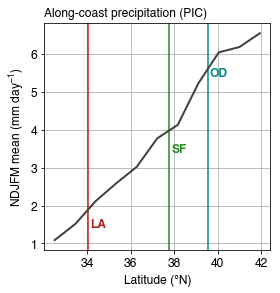

In [83]:
fontsize=12
fig = mp.figure(figsize=(4,4))

ax = fig.add_subplot(111)
ax.plot(PRECT_lat[lat_indices_unique], mean_pr_pic, c='0.25', lw=2)

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('NDJFM mean (mm day$^{-1}$)', fontsize=fontsize)
ax.set_xlabel('Latitude ('+degree_sign+'N)', fontsize=fontsize)

ax.axvline(LA_lat, c='firebrick', zorder=1)
ax.axvline(SF_lat, c='forestgreen', zorder=1)
ax.axvline(Oroville_dam_lat, c='darkcyan', zorder=1)

ax.text(s='LA', x=LA_lat+0.1, y=1.5, color='firebrick', ha='left', va='center', fontsize=fontsize, weight='bold')
ax.text(s='SF', x=SF_lat+0.1, y=3.5, color='forestgreen', ha='left', va='center', fontsize=fontsize, weight='bold')
ax.text(s='OD', x=Oroville_dam_lat+0.1, y=5.5, color='darkcyan', ha='left', va='center', fontsize=fontsize, weight='bold')

ax.grid()
ax.set_axisbelow(True)

ax.text(s='Along-coast precipitation (PIC)', x=0, y=1.03, transform=ax.transAxes, fontsize=fontsize)

fig.tight_layout()
fig.savefig('PIC_along_coast_seasonal_mean.pdf', transparent=True, bbox_inches='tight')

In [37]:
# open hist and RCP runs

In [68]:
mean_pr_ensemble = []

year_start = 2070
year_end = 2100

working_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/hist_and_rcp85_CA_REGION/'
for model_idx in range(hist_rcp_files.size):
    
    print(hist_rcp_files[model_idx])
    ncfile = netCDF4.Dataset(working_dir + hist_rcp_files[model_idx])
    PRECT_lat = ncfile.variables['lat'][:]
    PRECT_lon = ncfile.variables['lon'][:]
    PRECT_time_var = ncfile.variables['time']

    #print('done')
    PRECT_time_dates = netCDF4.num2date(PRECT_time_var[:], PRECT_time_var.units, PRECT_time_var.calendar)
    time_indices_NDJFM = numpy.array([t.month in [11,12,1,2,3] and t.year in range(year_start, year_end+1) for t in PRECT_time_dates], dtype=bool)
    PRECT_time_dates_NDJFM = PRECT_time_dates[time_indices_NDJFM]

    #print('done')
    PRECT_NDJFM_CA = ncfile.variables['PRECT'][time_indices_NDJFM, :, :]*86400.*1000
    PRECT_NDJFM_CA = PRECT_NDJFM_CA[:,coastal_latlon_array_indices[:,0],coastal_latlon_array_indices[:,1]]
    PRECT_NDJFM_CA = PRECT_NDJFM_CA.reshape((-1,11,3))
    mean_pr_model = numpy.mean(PRECT_NDJFM_CA, axis=0)
    mean_pr_model = numpy.mean(mean_pr_model, axis=1)
    
    mean_pr_ensemble.append(mean_pr_model)

hist_and_rcp85.001.PRECT.18500101-21001231_CA_REGION.nc
hist_and_rcp85.002.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.003.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.004.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.005.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.006.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.007.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.008.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.009.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.010.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.011.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.012.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.013.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.014.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.015.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.016.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.017.PRECT.19200101-21001231_CA_REGION.nc
hist_and_rcp85.018.PRECT.19200101-21001231_CA_RE

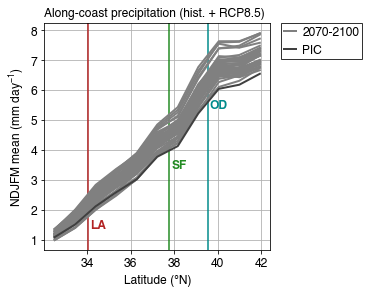

In [89]:
fontsize=12
fig = mp.figure(figsize=(4,4))

ax = fig.add_subplot(111)

for model_idx in range(hist_rcp_files.size):
    if model_idx==0:
        ax.plot(PRECT_lat[lat_indices_unique], mean_pr_ensemble[model_idx], c='0.5', lw=2, label='2070-2100')
    else:
        ax.plot(PRECT_lat[lat_indices_unique], mean_pr_ensemble[model_idx], c='0.5', lw=2)
ax.plot(PRECT_lat[lat_indices_unique], mean_pr_pic, c='0.25', lw=2, label='PIC')

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('NDJFM mean (mm day$^{-1}$)', fontsize=fontsize)
ax.set_xlabel('Latitude ('+degree_sign+'N)', fontsize=fontsize)

ax.axvline(LA_lat, c='firebrick', zorder=1)
ax.axvline(SF_lat, c='forestgreen', zorder=1)
ax.axvline(Oroville_dam_lat, c='darkcyan', zorder=1)

ax.text(s='LA', x=LA_lat+0.1, y=1.5, color='firebrick', ha='left', va='center', fontsize=fontsize, weight='bold')
ax.text(s='SF', x=SF_lat+0.1, y=3.5, color='forestgreen', ha='left', va='center', fontsize=fontsize, weight='bold')
ax.text(s='OD', x=Oroville_dam_lat+0.1, y=5.5, color='darkcyan', ha='left', va='center', fontsize=fontsize, weight='bold')

ax.grid()
ax.set_axisbelow(True)

handles,labels= ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, \
          ncol=1, bbox_to_anchor=(1.05,1.0), \
          edgecolor='0', facecolor='None', \
          fancybox=False, bbox_transform=ax.transAxes, \
          loc='upper left', borderaxespad=0, borderpad=0.25, \
          handlelength=1.0, handletextpad=0.5, \
          columnspacing=0.5, markerscale=1)

ax.text(s='Along-coast precipitation (hist. + RCP8.5)', x=0, y=1.03, transform=ax.transAxes, fontsize=fontsize)

fig.tight_layout()

fig.savefig('hist_rcp_along_coast_seasonal_mean.pdf', transparent=True, bbox_inches='tight')

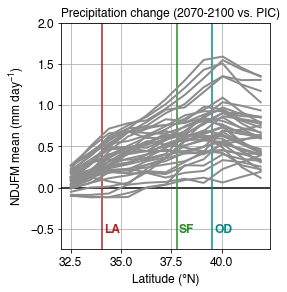

In [92]:
fontsize=12
fig = mp.figure(figsize=(4,4))

ax = fig.add_subplot(111)

for model_idx in range(hist_rcp_files.size):
    ax.plot(PRECT_lat[lat_indices_unique], mean_pr_ensemble[model_idx]-mean_pr_pic, c='0.55', lw=2)

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('NDJFM mean (mm day$^{-1}$)', fontsize=fontsize)
ax.set_xlabel('Latitude ('+degree_sign+'N)', fontsize=fontsize)

ax.set_ylim(-0.75,2)
ax.axhline(0, c='0.25', zorder=1, lw=2)

ax.axvline(LA_lat, c='firebrick', zorder=1)
ax.axvline(SF_lat, c='forestgreen', zorder=1)
ax.axvline(Oroville_dam_lat, c='darkcyan', zorder=1)

ax.text(s='LA', x=LA_lat+0.1, y=-0.5, color='firebrick', ha='left', va='center', fontsize=fontsize, weight='bold')
ax.text(s='SF', x=SF_lat+0.1, y=-0.5, color='forestgreen', ha='left', va='center', fontsize=fontsize, weight='bold')
ax.text(s='OD', x=Oroville_dam_lat+0.1, y=-0.5, color='darkcyan', ha='left', va='center', fontsize=fontsize, weight='bold')

ax.grid()
ax.set_axisbelow(True)

ax.text(s='Precipitation change (2070-2100 vs. PIC)', x=0, y=1.03, transform=ax.transAxes, fontsize=fontsize)

fig.tight_layout()

fig.savefig('EOC_CHANGES_along_coast_seasonal_mean.pdf', transparent=True, bbox_inches='tight')